In [ ]:
# install.packages('ggraph')
# install.packages('igraph')
# install.packages('hrbrthemes')
# install.packages('ggpubr')
# install.packages('patchwork')
# install.packages('ggthemes')

In [209]:
library('data.table')
library('dplyr')
library('tidyr')
library('ggplot2')
library('scales')
library('igraph')
library('ggraph')
library('viridis')
library('hrbrthemes')
library('gridExtra')
library('patchwork')
library('ggthemes')

In [86]:
titles <- fread("title_ratings", quote="", na.strings = "\\N")
aka <- fread("aka_filtered", quote = "", na.strings = "\\N")
crew <- fread("crew_filtered", na.strings = "\\N")
principals <- fread("principals_filtered", quote="", na.strings = "\\N")
ep_series <- fread("episodes_filtered", na.strings = "\\N")
names <-fread("names_filtered_new", na.strings = "\\N")

In [87]:
# titles and their ratings
head(titles, 3)
# the names of the titles in different languages, probably not relevant
head(aka, 3)
# list of writers and directors for each movie
head(crew, 3)
# list of roles of an actor in the given movie
head(principals, 3)
# table tying episodes to its tvSeries
head(ep_series, 3)
# names of the actors with the titles they starred in
head(names, 3)

tconst,titleType,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,year,averageRating,numVotes
<chr>,<chr>,<chr>,<chr>,<lgl>,<int>,<chr>,<int>,<dbl>,<int>
tt0043224,tvSeries,The Red Skelton Hour,The Red Skelton Show,FALSE,60,Comedy,2016,8.1,1285
tt0044265,tvSeries,Guiding Light,The Guiding Light,FALSE,60,"Drama,Romance",2009,6.4,1722
tt0048845,tvSeries,As the World Turns,As the World Turns,FALSE,60,"Drama,Romance",2010,6.1,2102


titleId,title,region,language,types,isOriginalTitle
<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
tt0043224,The Red Skelton Hour,US,NA,NA,FALSE
tt0043224,The Red Skelton Show,CA,en,imdbDisplay,FALSE
tt0043224,Шоу Рэда Скелтона,SUHH,ru,imdbDisplay,FALSE


tconst,directors,writers
<chr>,<chr>,<chr>
tt0043224,"nm0477438,nm0054846,nm1096821,nm0705228,nm0120437,nm0076971,nm0387695,nm0232902,nm1097266,nm1637827","nm0804026,nm0639495,nm0680226,nm0777442,nm0706417,nm0722289,nm1640023,nm0338876,nm0326239,nm0777129,nm0414633,nm0288997,nm1520544,nm0799745,nm0615080,nm0293159,nm0771627,nm0918826,nm0410536,nm2204703,nm0397170,nm0917200,nm0594174,nm0917026,nm0566588,nm0288816,nm3123274,nm0051332,nm2964448,nm0237341,nm0329085,nm1034110,nm3110698,nm0516015,nm0057677,nm0578441,nm0814068,nm0081748,nm0606806,nm0639787,nm0432188,nm0498586,nm0743232,nm2198070,nm0743259,nm0777202,nm0380890,nm2915847,nm0377958,nm1290769,nm7410201,nm0545131,nm0655462,nm3201019,nm0001992,nm0399849,nm0000036"
tt0044265,"nm0004098,nm0179413,nm1597578,nm1335675,nm0915727,nm0581589,nm0568114,nm0213789,nm0281224,nm0332752,nm0884037,nm0297489,nm0109586,nm0331135,nm1513459,nm0778479,nm0224683,nm0159012,nm0100841,nm0250864,nm2681961,nm1273119,nm0923396,nm0369858,nm2036776,nm1334802,nm1603516,nm1314913,nm1343326,nm0925870,nm0834419,nm2552851,nm3174789,nm0963061,nm0571983,nm0322900","nm2419908,nm1141830,nm2251709,nm2078312,nm1003809,nm0325029,nm1014203,nm1014177,nm0492953,nm1012482,nm1010971,nm0519133,nm0174585,nm0429390,nm2429218,nm2654235,nm1221904,nm0068550,nm1159577,nm0909529,nm3049540,nm0255819,nm0260547,nm0113780,nm0628248,nm0717622,nm0989904,nm1142664,nm0191612,nm1051829,nm2727176,nm4972117,nm0997483,nm0110828,nm1105215,nm3079954,nm1779986,nm2085815,nm0693044,nm0106187,nm0322325,nm0833510,nm0807006,nm0542021,nm3454108,nm0566699,nm2721275,nm4237316,nm0291507,nm0027442,nm1267575,nm1011786,nm0750422,nm1014193,nm0820121,nm1011976,nm1000132,nm1007597,nm0792404,nm1049086,nm0996693,nm1088908,nm0229890,nm0229908,nm0913330,nm0758444,nm3059609,nm0782462,nm0746169,nm0925335,nm0925388,nm0501148,nm2040174,nm0711626,nm1480454,nm0421246,nm0846520,nm0922948,nm2591020,nm0925872,nm1012917,nm9109568,nm0617002,nm0682274,nm3566933,nm0723559,nm1779949,nm0658855,nm0880986,nm1276101,nm1299367,nm0434560,nm0115032,nm1011004,nm0358462,nm2272293,nm0906799,nm0479525,nm0997301,nm3579833,nm0534951,nm1802728,nm0680460,nm2654307,nm0866801,nm2660138,nm1669530,nm0040612,nm0481805,nm1106086,nm0899533,nm2077775,nm2220634,nm1049067,nm2006443,nm0812026,nm0111576,nm0698989,nm0019706,nm0111577,nm0122417,nm0202681,nm0238898,nm0505615,nm0754581,nm0789737,nm0991335,nm0162914,nm1301702,nm3059996,nm0726721,nm1014206,nm2233247,nm0235902,nm10360337,nm1672253,nm1440687,nm1400899,nm5846217,nm0817957,nm2076865,nm9551033,nm3930118,nm0068589,nm0633202,nm0881501,nm0813960,nm0989955,nm0031021,nm0097597,nm0112601,nm0148223,nm0313072,nm0368575,nm0513851,nm0564474"
tt0048845,"nm0332752,nm0824738,nm0100841,nm0179413,nm0251732,nm0887790,nm4029369,nm0245698,nm0777413,nm0114113,nm0157553,nm0384316,nm0906004,nm0041715,nm0219989,nm0242409,nm1681063,nm1212523,nm0856388,nm0004098,nm0594204,nm0046490,nm1408290,nm0446060,nm0483582,nm0357800,nm0639479,nm0581589,nm2483215,nm0213789,nm0017875,nm0802986,nm0295925,nm1656173,nm0884037,nm1032520,nm0591523,nm1010949,nm0923396,nm0672625,nm0867723,nm1603516,nm0109586,nm0571983,nm0677210,nm0139400,nm0656440,nm0125226,nm0672627,nm0641266,nm0723593,nm0963061","nm0664799,nm1923276,nm1007597,nm2419908,nm1010949,nm3049540,nm1779949,nm1779986,nm1049066,nm0680460,nm0633202,nm0790760,nm1014174,nm1299367,nm1014216,nm0045741,nm1014167,nm1011004,nm0481805,nm0909529,nm1014175,nm0106187,nm0787317,nm0655491,nm1780023,nm1011440,nm0792404,nm1010971,nm1141830,nm1400899,nm0153944,nm1014176,nm0617002,nm1014164,nm1014206,nm0429390,nm0507406,nm0925872,nm0713131,nm0108338,nm0191612,nm1042591,nm1010857,nm0632525,nm1088908,nm1892355,nm0325029,nm1250955,nm0996693,nm1104059,nm0255034,nm0110828,nm2812299,nm2663899,nm0335072,nm1045621,nm0494959,nm0711626,nm0085519,nm1250889,nm0827711,nm1142664,nm1113445,nm10285461,nm1014207,nm1715559,nm1809263,nm1012917,nm2591020,nm1276101,nm0071291,nm1049067,nm2373457,nm1030464,nm1000124,nm3113329,nm1431618,nm1051829,nm0311869,nm1089437,nm04

tconst,ordering,nconst,category,job,characters
<chr>,<int>,<chr>,<chr>,<chr>,<chr>
tt0043224,10,nm0461246,self,NA,"[""Self - Commercials"",""Commercials"",""Blonde Nurse-Hospital Sketch""]"
tt0043224,1,nm0804026,self,NA,"[""Self - Host"",""Clem Kadiddlehopper"",""Freddie the Freeloader""]"
tt0043224,2,nm2582914,self,NA,"[""Themselves"",""Orchestra"",""Singers""]"


tconst,parentTconst,seasonNumber,episodeNumber
<chr>,<chr>,<int>,<int>
tt0114532,tt0874686,1,2
tt0124961,tt0159876,49,15
tt0130097,tt0273026,NA,NA


nconst,primaryName,birthYear,deathYear,primaryProfession,ratings_total,avg_rating,n
<chr>,<chr>,<int>,<int>,<chr>,<int>,<dbl>,<int>
nm1217514,Rodrigo Ordoñez,1972,NA,"writer,director,assistant_director",358,6.375000,4
nm1217515,Suze Orman,1951,NA,"producer,actress",528315,7.925000,4
nm1217519,Yaky Ortega,NA,NA,"director,miscellaneous",468,7.033333,4


## Further filtering

### Series episodes split

In [88]:
series <- titles %>% filter(titleType != 'tvEpisode')
episodes <- titles %>% filter(titleType == 'tvEpisode')
count(series)
count(episodes)

n
<int>
77090


n
<int>
459147


### Filter tvSeries under 1000 reviews and their related elements

In [89]:
series <- series %>% filter(numVotes >= 1000)

In [90]:
ep_series <- ep_series %>% filter(parentTconst %in% series$tconst)

In [91]:
episodes <- episodes %>% filter(tconst %in% ep_series$tconst)

In [92]:
principals <- principals %>% filter(tconst %in% series$tconst | tconst %in% episodes$tconst)
names_filtered <- names %>% filter(nconst %in% principals$nconst)
aka_filtered <- aka %>% filter(titleId %in% series$tconst | titleId %in% episodes$tconst)
crew_filtered <- crew %>% filter(tconst %in% series$tconst | tconst %in% episodes$tconst)

Add number of seasons to the tv series

In [93]:
num_seasons <- ep_series %>% filter(!is.na(seasonNumber)) %>% group_by(parentTconst) %>% summarize(seasons = max(seasonNumber))

In [94]:
series <- merge(x = series, y = num_seasons, by.x = 'tconst', by.y = 'parentTconst', all.x = TRUE, all.y = FALSE)

### Data transformations

In [95]:
# series and episodes, - split genres, type -> factor
series$titleType = as.factor(series$titleType)
series <- series %>% mutate(genres = strsplit(genres, split=','))
episodes$titleType = as.factor(episodes$titleType)
episodes <- episodes %>% mutate(genres = strsplit(genres, split=','))
head(episodes)

tconst,titleType,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,year,averageRating,numVotes
<chr>,<fct>,<chr>,<chr>,<lgl>,<int>,<list>,<int>,<dbl>,<int>
tt0182919,tvEpisode,Murder with Too Many Notes,Murder with Too Many Notes,FALSE,98,"Crime , Drama , Mystery",2000,6.7,1666
tt0187660,tvEpisode,The Octopus 10,La piovra 10,FALSE,102,"Crime , Drama , Mystery",2001,7.3,295
tt0199398,tvEpisode,The Terracotta Dog,Il cane di terracotta,FALSE,102,"Crime , Drama , Mystery",2000,7.6,281
tt0199536,tvEpisode,The Shape of Water,La forma dell'acqua,FALSE,112,"Crime , Drama , Mystery",2000,7.5,386
tt0221289,tvEpisode,Pilot,Pilot,FALSE,120,"Action, Comedy, Sci-Fi",2000,7.6,468
tt0235326,tvEpisode,Pilot,Pilot,FALSE,87,"Action , Drama , Mystery",2000,7.3,2427


In [96]:
# crew - split directors and writers
crew <- crew %>% mutate(directors = strsplit(directors, split = ','), writers = strsplit(writers, split = ','))
head(crew, 3)

tconst,directors,writers
<chr>,<list>,<list>
tt0043224,"nm0477438, nm0054846, nm1096821, nm0705228, nm0120437, nm0076971, nm0387695, nm0232902, nm1097266, nm1637827","nm0804026, nm0639495, nm0680226, nm0777442, nm0706417, nm0722289, nm1640023, nm0338876, nm0326239, nm0777129, nm0414633, nm0288997, nm1520544, nm0799745, nm0615080, nm0293159, nm0771627, nm0918826, nm0410536, nm2204703, nm0397170, nm0917200, nm0594174, nm0917026, nm0566588, nm0288816, nm3123274, nm0051332, nm2964448, nm0237341, nm0329085, nm1034110, nm3110698, nm0516015, nm0057677, nm0578441, nm0814068, nm0081748, nm0606806, nm0639787, nm0432188, nm0498586, nm0743232, nm2198070, nm0743259, nm0777202, nm0380890, nm2915847, nm0377958, nm1290769, nm7410201, nm0545131, nm0655462, nm3201019, nm0001992, nm0399849, nm0000036"
tt0044265,"nm0004098, nm0179413, nm1597578, nm1335675, nm0915727, nm0581589, nm0568114, nm0213789, nm0281224, nm0332752, nm0884037, nm0297489, nm0109586, nm0331135, nm1513459, nm0778479, nm0224683, nm0159012, nm0100841, nm0250864, nm2681961, nm1273119, nm0923396, nm0369858, nm2036776, nm1334802, nm1603516, nm1314913, nm1343326, nm0925870, nm0834419, nm2552851, nm3174789, nm0963061, nm0571983, nm0322900","nm2419908 , nm1141830 , nm2251709 , nm2078312 , nm1003809 , nm0325029 , nm1014203 , nm1014177 , nm0492953 , nm1012482 , nm1010971 , nm0519133 , nm0174585 , nm0429390 , nm2429218 , nm2654235 , nm1221904 , nm0068550 , nm1159577 , nm0909529 , nm3049540 , nm0255819 , nm0260547 , nm0113780 , nm0628248 , nm0717622 , nm0989904 , nm1142664 , nm0191612 , nm1051829 , nm2727176 , nm4972117 , nm0997483 , nm0110828 , nm1105215 , nm3079954 , nm1779986 , nm2085815 , nm0693044 , nm0106187 , nm0322325 , nm0833510 , nm0807006 , nm0542021 , nm3454108 , nm0566699 , nm2721275 , nm4237316 , nm0291507 , nm0027442 , nm1267575 , nm1011786 , nm0750422 , nm1014193 , nm0820121 , nm1011976 , nm1000132 , nm1007597 , nm0792404 , nm1049086 , nm0996693 , nm1088908 , nm0229890 , nm0229908 , nm0913330 , nm0758444 , nm3059609 , nm0782462 , nm0746169 , nm0925335 , nm0925388 , nm0501148 , nm2040174 , nm0711626 , nm1480454 , nm0421246 , nm0846520 , nm0922948 , nm2591020 , nm0925872 , nm1012917 , nm9109568 , nm0617002 , nm0682274 , nm3566933 , nm0723559 , nm1779949 , nm0658855 , nm0880986 , nm1276101 , nm1299367 , nm0434560 , nm0115032 , nm1011004 , nm0358462 , nm2272293 , nm0906799 , nm0479525 , nm0997301 , nm3579833 , nm0534951 , nm1802728 , nm0680460 , nm2654307 , nm0866801 , nm2660138 , nm1669530 , nm0040612 , nm0481805 , nm1106086 , nm0899533 , nm2077775 , nm2220634 , nm1049067 , nm2006443 , nm0812026 , nm0111576 , nm0698989 , nm0019706 , nm0111577 , nm0122417 , nm0202681 , nm0238898 , nm0505615 , nm0754581 , nm0789737 , nm0991335 , nm0162914 , nm1301702 , nm3059996 , nm0726721 , nm1014206 , nm2233247 , nm0235902 , nm10360337, nm1672253 , nm1440687 , nm1400899 , nm5846217 , nm0817957 , nm2076865 , nm9551033 , nm3930118 , nm0068589 , nm0633202 , nm0881501 , nm0813960 , nm0989955 , nm0031021 , nm0097597 , nm0112601 , nm0148223 , nm0313072 , nm0368575 , nm0513851 , nm0564474"
tt0048845,"nm0332752, nm0824738, nm0100841, nm0179413, nm0251732, nm0887790, nm4029369, nm0245698, nm0777413, nm0114113, nm0157553, nm0384316, nm0906004, nm0041715, nm0219989, nm0242409, nm1681063, nm1212523, nm0856388, nm0004098, nm0594204, nm0046490, nm1408290, nm0446060, nm0483582, nm0357800, nm0639479, nm0581589, nm2483215, nm0213789, nm0017875, nm0802986, nm0295925, nm1656173, nm0884037, nm1032520, nm0591523, nm1010949, nm0923396, nm0672625, nm0867723, nm1603516, nm0109586, nm0571983, nm0677210, nm0139400, nm0656440, nm0125226, nm0672627, nm0641266, nm0723593, nm0963061","nm0664799 , nm1923276 , nm1007597 , nm2419908 , nm1010949 , nm3049540 , nm1779949 , nm1779986 , nm1049066 , nm0680460 , nm0633202 , nm0790760 , nm1014174 , nm1299367 , nm1014216 , nm0045741 , nm1014167 , nm1011004 , nm0481805 , nm0909529 , nm1014175 , nm0106187 , nm0787317 , nm0655491 , nm1780023 , nm1011440 , nm0792404 , nm1010971 , nm11418

In [97]:
# principals - delete brackets from characters and split, catogry -> factor
principals$category <- as.factor(principals$category)
principals$characters <- gsub("\\]", '', principals$characters)
principals$characters <- gsub("\\[", '', principals$characters)
principals$characters <- gsub('"', '', principals$characters)
principals$characters <- gsub('"', '', principals$characters)
principals <- principals %>% mutate(characters = strsplit(characters, split = ','))
head(principals, 3)

tconst,ordering,nconst,category,job,characters
<chr>,<int>,<chr>,<fct>,<chr>,<list>
tt0043224,10,nm0461246,self,NA,"Self - Commercials , Commercials , Blonde Nurse-Hospital Sketch"
tt0043224,1,nm0804026,self,NA,"Self - Host , Clem Kadiddlehopper , Freddie the Freeloader"
tt0043224,2,nm2582914,self,NA,"Themselves, Orchestra , Singers"


In [98]:
# ep_series - season and ep number -> int
ep_series$seasonNumber <- as.integer(ep_series$seasonNumber)
ep_series$episodeNumber <- as.integer(ep_series$episodeNumber)
head(ep_series, 3)

tconst,parentTconst,seasonNumber,episodeNumber
<chr>,<chr>,<int>,<int>
tt0182919,tt1466074,13,4
tt0187660,tt0086779,10,1
tt0199398,tt0920489,2,2


In [99]:
# names - split proffesion and titles
names <- names %>% mutate(primaryProfession = strsplit(primaryProfession, split = ','))
head(names, 3)

nconst,primaryName,birthYear,deathYear,primaryProfession,ratings_total,avg_rating,n
<chr>,<chr>,<int>,<int>,<list>,<int>,<dbl>,<int>
nm1217514,Rodrigo Ordoñez,1972,NA,"writer , director , assistant_director",358,6.375000,4
nm1217515,Suze Orman,1951,NA,"producer, actress",528315,7.925000,4
nm1217519,Yaky Ortega,NA,NA,"director , miscellaneous",468,7.033333,4


In [100]:
# free up memory after transformations
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,8813074,470.7,20046100,1070.6,25057625,1338.3
Vcells,166361788,1269.3,297283320,2268.1,296640320,2263.2


## Project

### People + aggregate data of the series they played in

This few cells probably useless, keeping them just to make sure

In [101]:
title_person = merge(principals, series, by = "tconst", all=FALSE)
head(title_person, 10)

tconst,ordering,nconst,category,job,characters,titleType,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,year,averageRating,numVotes,seasons
<chr>,<int>,<chr>,<fct>,<chr>,<list>,<fct>,<chr>,<chr>,<lgl>,<int>,<list>,<int>,<dbl>,<int>,<int>
tt0043224,10,nm0461246,self,NA,"Self - Commercials , Commercials , Blonde Nurse-Hospital Sketch",tvSeries,The Red Skelton Hour,The Red Skelton Show,FALSE,60,Comedy,2016,8.1,1285,NA
tt0043224,1,nm0804026,self,NA,"Self - Host , Clem Kadiddlehopper , Freddie the Freeloader",tvSeries,The Red Skelton Hour,The Red Skelton Show,FALSE,60,Comedy,2016,8.1,1285,NA
tt0043224,2,nm2582914,self,NA,"Themselves, Orchestra , Singers",tvSeries,The Red Skelton Hour,The Red Skelton Show,FALSE,60,Comedy,2016,8.1,1285,NA
tt0043224,3,nm0319497,actor,NA,"Announcer , Self - Announcer , Baseball Broadcaster",tvSeries,The Red Skelton Hour,The Red Skelton Show,FALSE,60,Comedy,2016,8.1,1285,NA
tt0043224,4,nm2785822,self,NA,"Themselves , Can Can Dancers, Harem Dancers",tvSeries,The Red Skelton Hour,The Red Skelton Show,FALSE,60,Comedy,2016,8.1,1285,NA
tt0043224,5,nm0545131,writer,created by,NA,tvSeries,The Red Skelton Hour,The Red Skelton Show,FALSE,60,Comedy,2016,8.1,1285,NA
tt0043224,6,nm0038066,actor,NA,"Paw Kadiddlehopper, Pa Kadiddlehopper , Muggsy",tvSeries,The Red Skelton Hour,The Red Skelton Show,FALSE,60,Comedy,2016,8.1,1285,NA
tt0043224,7,nm3124732,self,NA,"Themselves, Selves , Singers",tvSeries,The Red Skelton Hour,The Red Skelton Show,FALSE,60,Comedy,2016,8.1,1285,NA
tt0043224,8,nm0483617,actor,NA,"Announcer , Self - Announcer",tvSeries,The Red Skelton Hour,The Red Skelton Show,FALSE,60,Comedy,2016,8.1,1285,NA


In [102]:
name_ratings <- title_person %>% group_by(nconst) %>% summarise(
    meanRating = mean(averageRating), averageVotes = mean(numVotes), weightedRating = sum(averageRating *  numVotes), sumVotes=sum(numVotes), ) %>%
    transform(weightedRating = weightedRating / sumVotes)

In [103]:
actor_rating <- title_person %>% filter(category == 'actor') %>% group_by(nconst) %>% summarise(
    meanRating = mean(averageRating), averageVotes = mean(numVotes), weightedRating = sum(averageRating *  numVotes), sumVotes=sum(numVotes)) %>%
    transform(weightedRating = weightedRating / sumVotes)
head(actor_rating, 3)

,nconst,meanRating,averageVotes,weightedRating,sumVotes
,<chr>,<dbl>,<dbl>,<dbl>,<int>
1,nm0000056,7.20,5874.0,7.200000,5874
2,nm0000092,8.55,28228.5,8.788372,56457
3,nm0000093,7.30,2305.0,7.300000,2305


### Quality of the cast and crew across genres

In [75]:
names_tmp <- names %>% mutate(ratings_total = (ratings_total / n))
names_tmp$ratings_total <- scales::rescale(names_tmp$ratings_total, to=c(0,1))
names_tmp$avg_rating <- scales::rescale(names_tmp$avg_rating, to=c(0,1))
names_tmp <- names_tmp %>% mutate(success = (ratings_total + avg_rating) / 2 * 10)

In [76]:
comedies <- series %>% mutate(new_col = lapply(genres, function (x) 'Comedy' %in% x)) %>% filter(new_col == TRUE) %>% select(-new_col)

In [77]:
crew_write <- fread("crew_filtered", na.strings = "\\N")
crew_write <- crew_write %>% mutate(directors = strsplit(writers, split = ','))
crew_write <- separate_rows(crew_write, writers)
crew_write <- crew_write %>% select(-directors)

In [78]:
crew_direc <- fread("crew_filtered", na.strings = "\\N")
crew_direc <- crew_direc %>% mutate(writers = strsplit(writers, split = ','))
crew_direc <- separate_rows(crew_direc, directors)
crew_direc <- crew_direc %>% select(-writers)

In [317]:
options(dplyr.summarise.inform = FALSE)

options(repr.plot.width=9, repr.plot.height=8, repr.plot.res = 250)

In [219]:
options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 250)

In [220]:
genre <- 'Comedy'
comedies <- series %>% mutate(new_col = lapply(genres, function (x) genre %in% x)) %>% filter(new_col == TRUE) %>% select(-new_col)
comedies$averageRating <- scales::rescale(comedies$averageRating, to = c(0,1))
comedies$numVotes <- scales::rescale(comedies$numVotes, to = c(0,1))
comedies$seasons <- scales::rescale(comedies$seasons, to = c(0,1))
comedies <- comedies %>% mutate(com_success = (averageRating + numVotes + seasons) / 3 * 10)

comedies_actor <- merge(comedies, principals, by.x = 'tconst', by.y = 'tconst', x.all = FALSE, y.all = FALSE)
comedies_actor <- comedies_actor %>% filter(category == 'actor')
comedies_actor <- merge(comedies_actor, names_tmp, by.x = 'nconst', by.y = 'nconst', all.x = FALSE, all.y = FALSE)
comedies_actor <- comedies_actor %>% filter(!is.na(com_success)) %>% group_by(tconst, com_success) %>% summarize(crew_success = mean(success)) %>% mutate(type = 'actors') %>% filter(!is.na(crew_success))

comedies_direc <- merge(comedies, crew_direc, by.x = 'tconst', by.y = 'tconst', x.all = FALSE, y.all = FALSE)
comedies_direc <- merge(comedies_direc, names_tmp, by.x = 'directors', by.y = 'nconst', all.x = FALSE, all.y = FALSE)
comedies_direc <- comedies_direc %>% group_by(tconst, com_success) %>% summarize(crew_success = mean(success)) %>% filter(!is.na(com_success)) %>% mutate(type = 'directors') %>% filter(!is.na(crew_success))

comedies_write <- merge(comedies, crew_write, by.x = 'tconst', by.y = 'tconst', x.all = FALSE, y.all = FALSE)
comedies_write <- merge(comedies_write, names_tmp, by.x = 'writers', by.y = 'nconst', all.x = FALSE, all.y = FALSE)
comedies_write <- comedies_write %>% group_by(tconst, com_success) %>% summarize(crew_success = mean(success)) %>% filter(!is.na(com_success)) %>% mutate(type = 'writers') %>% filter(!is.na(crew_success))

In [294]:
full <- full %>% mutate(new_col = ifelse(type == 'actors', 0.1, 0.7))
ggplot(full, aes(x=crew_success, y=com_success, color = type, shape = type)) + 
            ggtitle(genre) +
            ylab("Title success") +
            xlab("Cast success") +
            geom_point(size=1, alpha = new_col) +
            geom_smooth(method='lm') +
            scale_colour_economist() +
            theme_economist() +
            theme(legend.position="none", plot.title = element_text(size=15))

ERROR: Error in list2(na.rm = na.rm, ...): object 'new_col' not found


In [355]:
create_genre_plot <- function (genre) {
    comedies <- series %>% mutate(new_col = lapply(genres, function (x) genre %in% x)) %>% filter(new_col == TRUE) %>% select(-new_col)
    comedies$averageRating <- scales::rescale(comedies$averageRating, to = c(0,1))
    comedies$numVotes <- scales::rescale(comedies$numVotes, to = c(0,1))
    comedies$seasons <- scales::rescale(comedies$seasons, to = c(0,1))
    comedies <- comedies %>% mutate(com_success = (averageRating + numVotes + seasons) / 3 * 10)
                                                   
    comedies_actor <- merge(comedies, principals, by.x = 'tconst', by.y = 'tconst', x.all = FALSE, y.all = FALSE)
    comedies_actor <- comedies_actor %>% filter(category == 'actor')
    comedies_actor <- merge(comedies_actor, names_tmp, by.x = 'nconst', by.y = 'nconst', all.x = FALSE, all.y = FALSE)
    comedies_actor <- comedies_actor %>% filter(!is.na(com_success)) %>% group_by(tconst, com_success) %>% summarize(crew_success = mean(success)) %>% mutate(type = 'actors') %>% filter(!is.na(crew_success))

    comedies_direc <- merge(comedies, crew_direc, by.x = 'tconst', by.y = 'tconst', x.all = FALSE, y.all = FALSE)
    comedies_direc <- merge(comedies_direc, names_tmp, by.x = 'directors', by.y = 'nconst', all.x = FALSE, all.y = FALSE)
    comedies_direc <- comedies_direc %>% group_by(tconst, com_success) %>% summarize(crew_success = mean(success)) %>% filter(!is.na(com_success)) %>% mutate(type = 'directors') %>% filter(!is.na(crew_success))
                                                   
    comedies_write <- merge(comedies, crew_write, by.x = 'tconst', by.y = 'tconst', x.all = FALSE, y.all = FALSE)
    comedies_write <- merge(comedies_write, names_tmp, by.x = 'writers', by.y = 'nconst', all.x = FALSE, all.y = FALSE)
    comedies_write <- comedies_write %>% group_by(tconst, com_success) %>% summarize(crew_success = mean(success)) %>% filter(!is.na(com_success)) %>% mutate(type = 'writers') %>% filter(!is.na(crew_success))
                                                   
    full <- rbind(comedies_direc, comedies_write)
    full <- rbind(full, comedies_actor)
    plt <- ggplot(full, aes(x=crew_success, y=com_success, color = type, shape = type)) + 
            ggtitle(genre) +
            ylab("Title success") +
            xlab("Cast success") +
            geom_point(size=1, show.legend = NA, alpha = 0.7) +
            guides(colour = guide_legend(override.aes = list(size=4))) +
            geom_smooth(method='lm', se = FALSE, show.legend = FALSE) +
            theme(legend.position="none", plot.title = element_text(size=15)) +
            scale_color_viridis(discrete = TRUE, option="cividis")
            theme_ipsum()
    return(plt)
}

In [356]:
chosen_genres <- c('Drama', 'Comedy', 'Crime', 'Action', 'Animation', 'Adventure', 'Mystery', 'Romance', 'Documentary')
plots <- lapply(chosen_genres, create_genre_plot)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


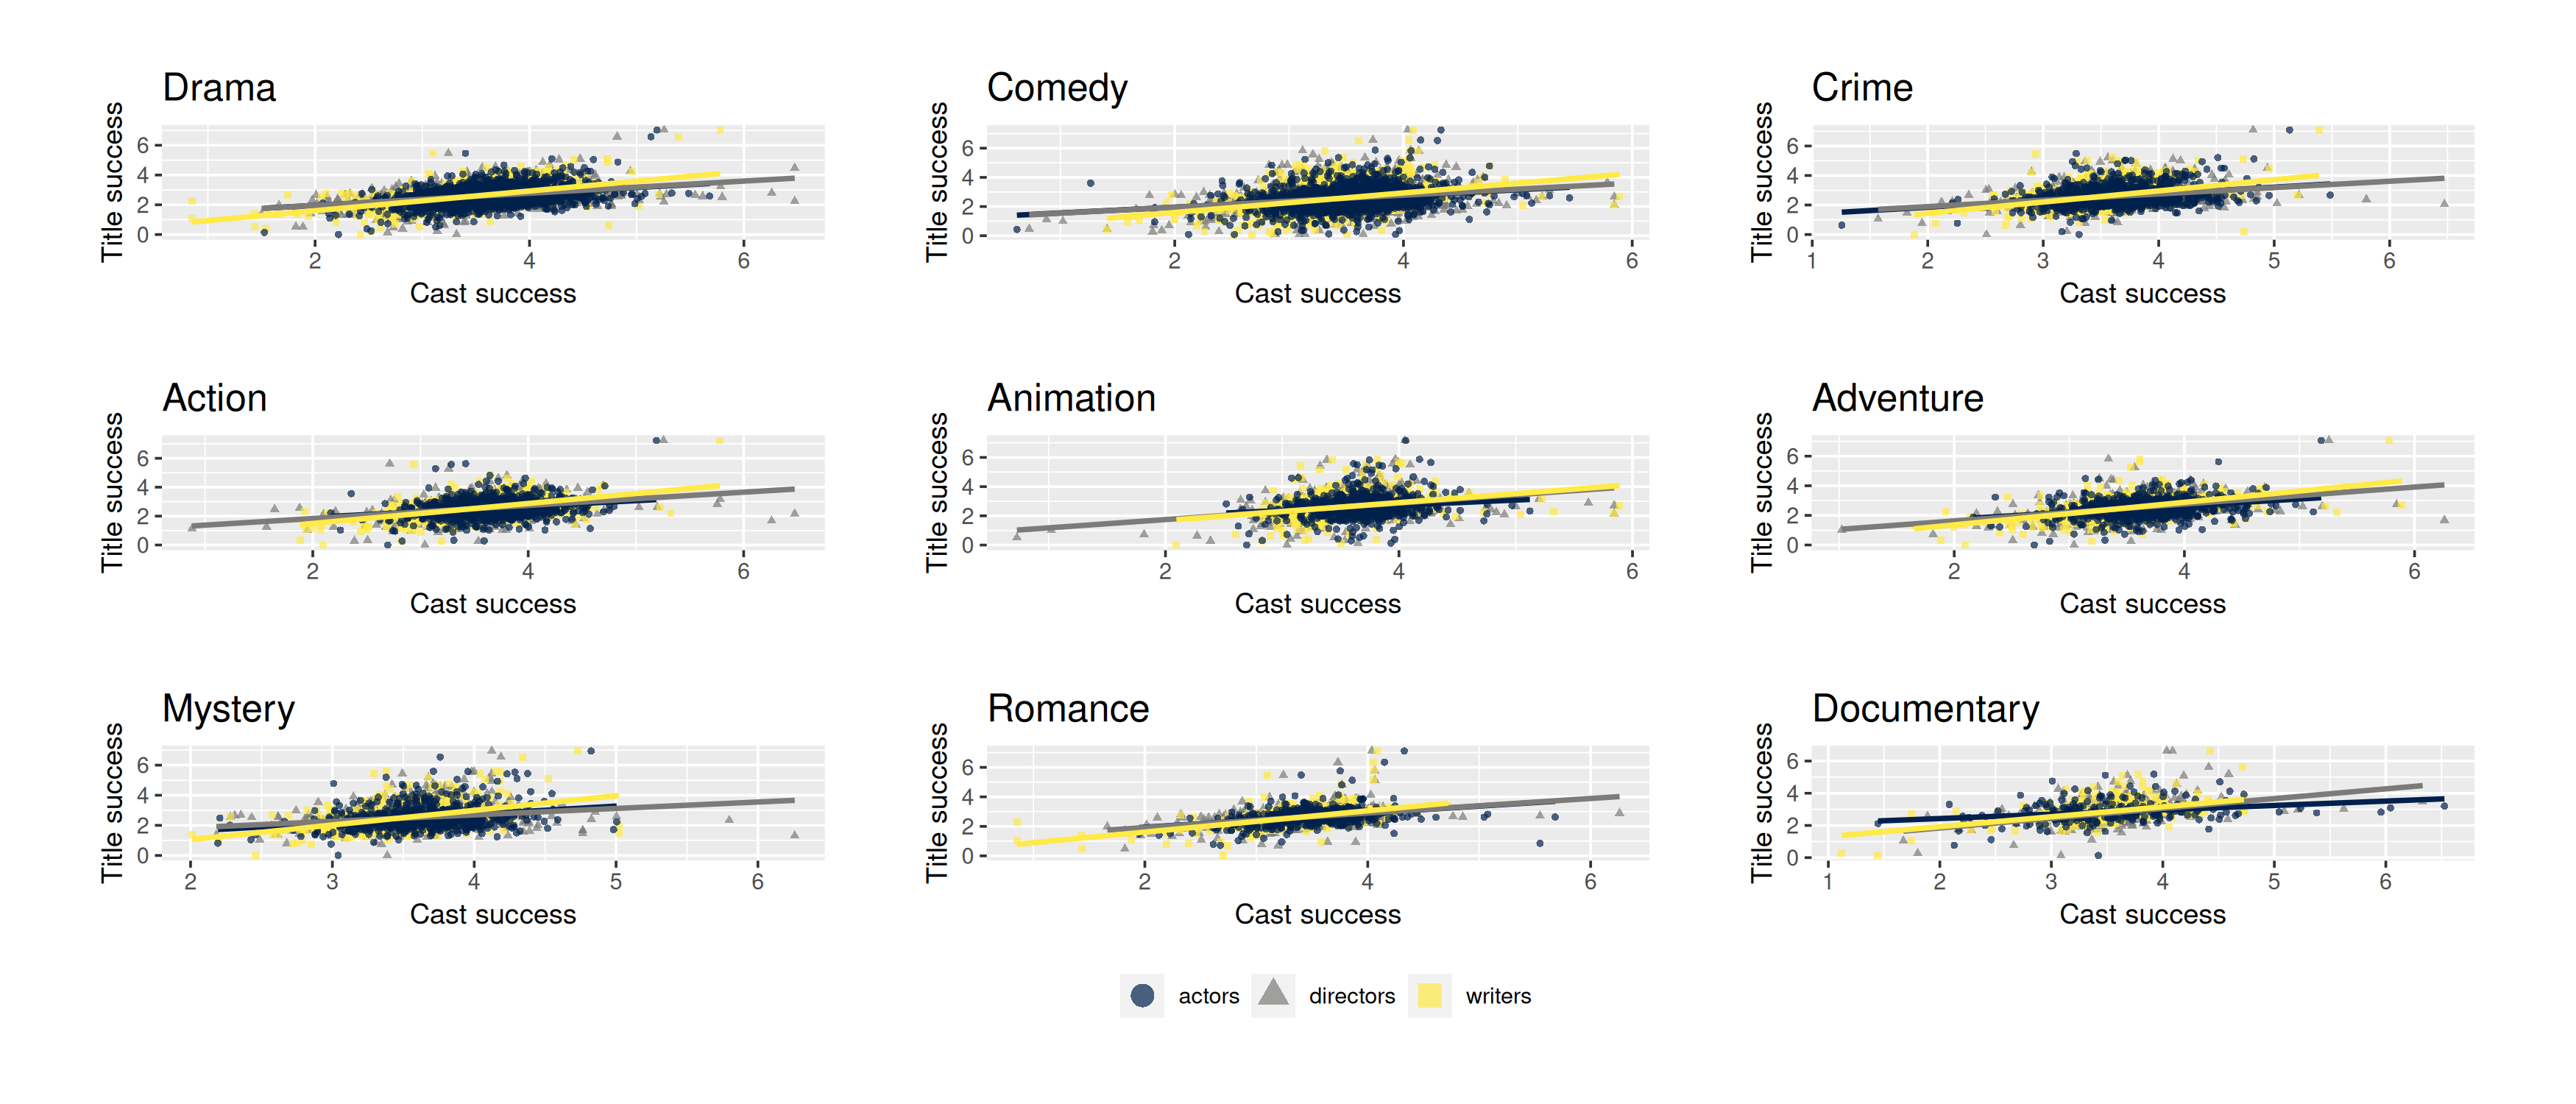

In [357]:
wrap_plots(plots, guides="collect") & theme(legend.position = "bottom", legend.title = element_blank(), plot.margin=grid::unit(c(5,7,5,7), "mm"))

### Heatmap of categories together

In [295]:
genres_list <- as.data.frame(table(unlist(series$genres)))
genres_list <- genres_list  %>% arrange(by = -Freq) %>% filter(Freq > 300)
genres_list <- genres_list$Var1

In [296]:
genres_list <- genres_list[order(genres_list)]

In [297]:
series_temp <- series

In [298]:
series_temp$genres <- lapply(series_temp$genres, function (x) x[x %in% genres_list])

In [299]:
heat_df <- data.frame(x = character(), y = character(), reviews_avg = double(), rating_avg = double(), amount = integer(), seasons = integer())

In [300]:
series_temp$new_col <- lapply(series_temp$genres, function (x) 'Animation' %in% x & 'Comedy' %in% x)
series_temp$seasons <- as.numeric(series_temp$seasons)
a <- series_temp[series_temp$new_col == TRUE] %>% head() %>% select(seasons) %>% filter(!is.na(seasons))
mean(unlist(select(a, seasons)), na.rm = TRUE)

[1] 10.5

In [301]:
for (k in 1:length(genres_list)) {
    for (l in k:length(genres_list)) {
        i = genres_list[k]
        j = genres_list[l]
        series_temp$new_col <- lapply(series_temp$genres, function (x) i %in% x & j %in% x)
        tmp <- series_temp %>% filter(new_col == TRUE)
        num <- count(tmp)
        tmp <- tmp %>% summarise(suma = mean(numVotes), rating = mean(averageRating), seasons = trunc(mean(unlist(seasons), na.rm = TRUE)))
        if (i == 'Crime' & j == 'Family') {
            tmp[[3]] <- 0
        }
        heat_df <- heat_df %>% add_row(x = i, y = j, reviews_avg = tmp[[1]], rating_avg = tmp[[2]], amount = num[[1]], seasons = tmp[[3]])
    }
}

In [ ]:
heat_df

In [303]:
options(repr.plot.width=8, repr.plot.height=7, repr.plot.res = 250)

**Categories together average num of reviews and average rating**
* The success of historical thriller caused by Chernobyl and not many other things in the genre
* It is on the dataset of tvSeries with more than 1k reviews but I tried on the unfiltered one and the results were almost identical

In [390]:
plt1 <- ggplot(heat_df, aes(x = y, y = x, fill=reviews_avg)) + 
  geom_tile() +
  scale_y_discrete(position = "right") +
  scale_fill_viridis(discrete=FALSE, option = "mako") +
  theme_ipsum(base_size = 13) +
  geom_text(aes(label = round(rating_avg, 1))) +
  labs(fill = "Average number \n     of ratings") +
  xlab("") + 
  ylab("") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=0))

**Categories together average num of seaons and number of tv series comprising of the given two categories**

In [436]:
plt2 <- ggplot(heat_df, aes(x = y, y = x, fill=amount)) + 
  geom_tile() +
  scale_y_discrete(position = "right") +
  scale_fill_viridis(discrete=FALSE, option = "mako") +
  theme_ipsum(base_size = 13) +
  geom_text(aes(label = round(seasons, 1))) +
  labs(fill = "Number of\n TV series") +
  xlab("") + 
  ylab("") +
  theme(axis.text.x = element_text(angle = 60, vjust = 1, hjust=1))

In [437]:
options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 250)

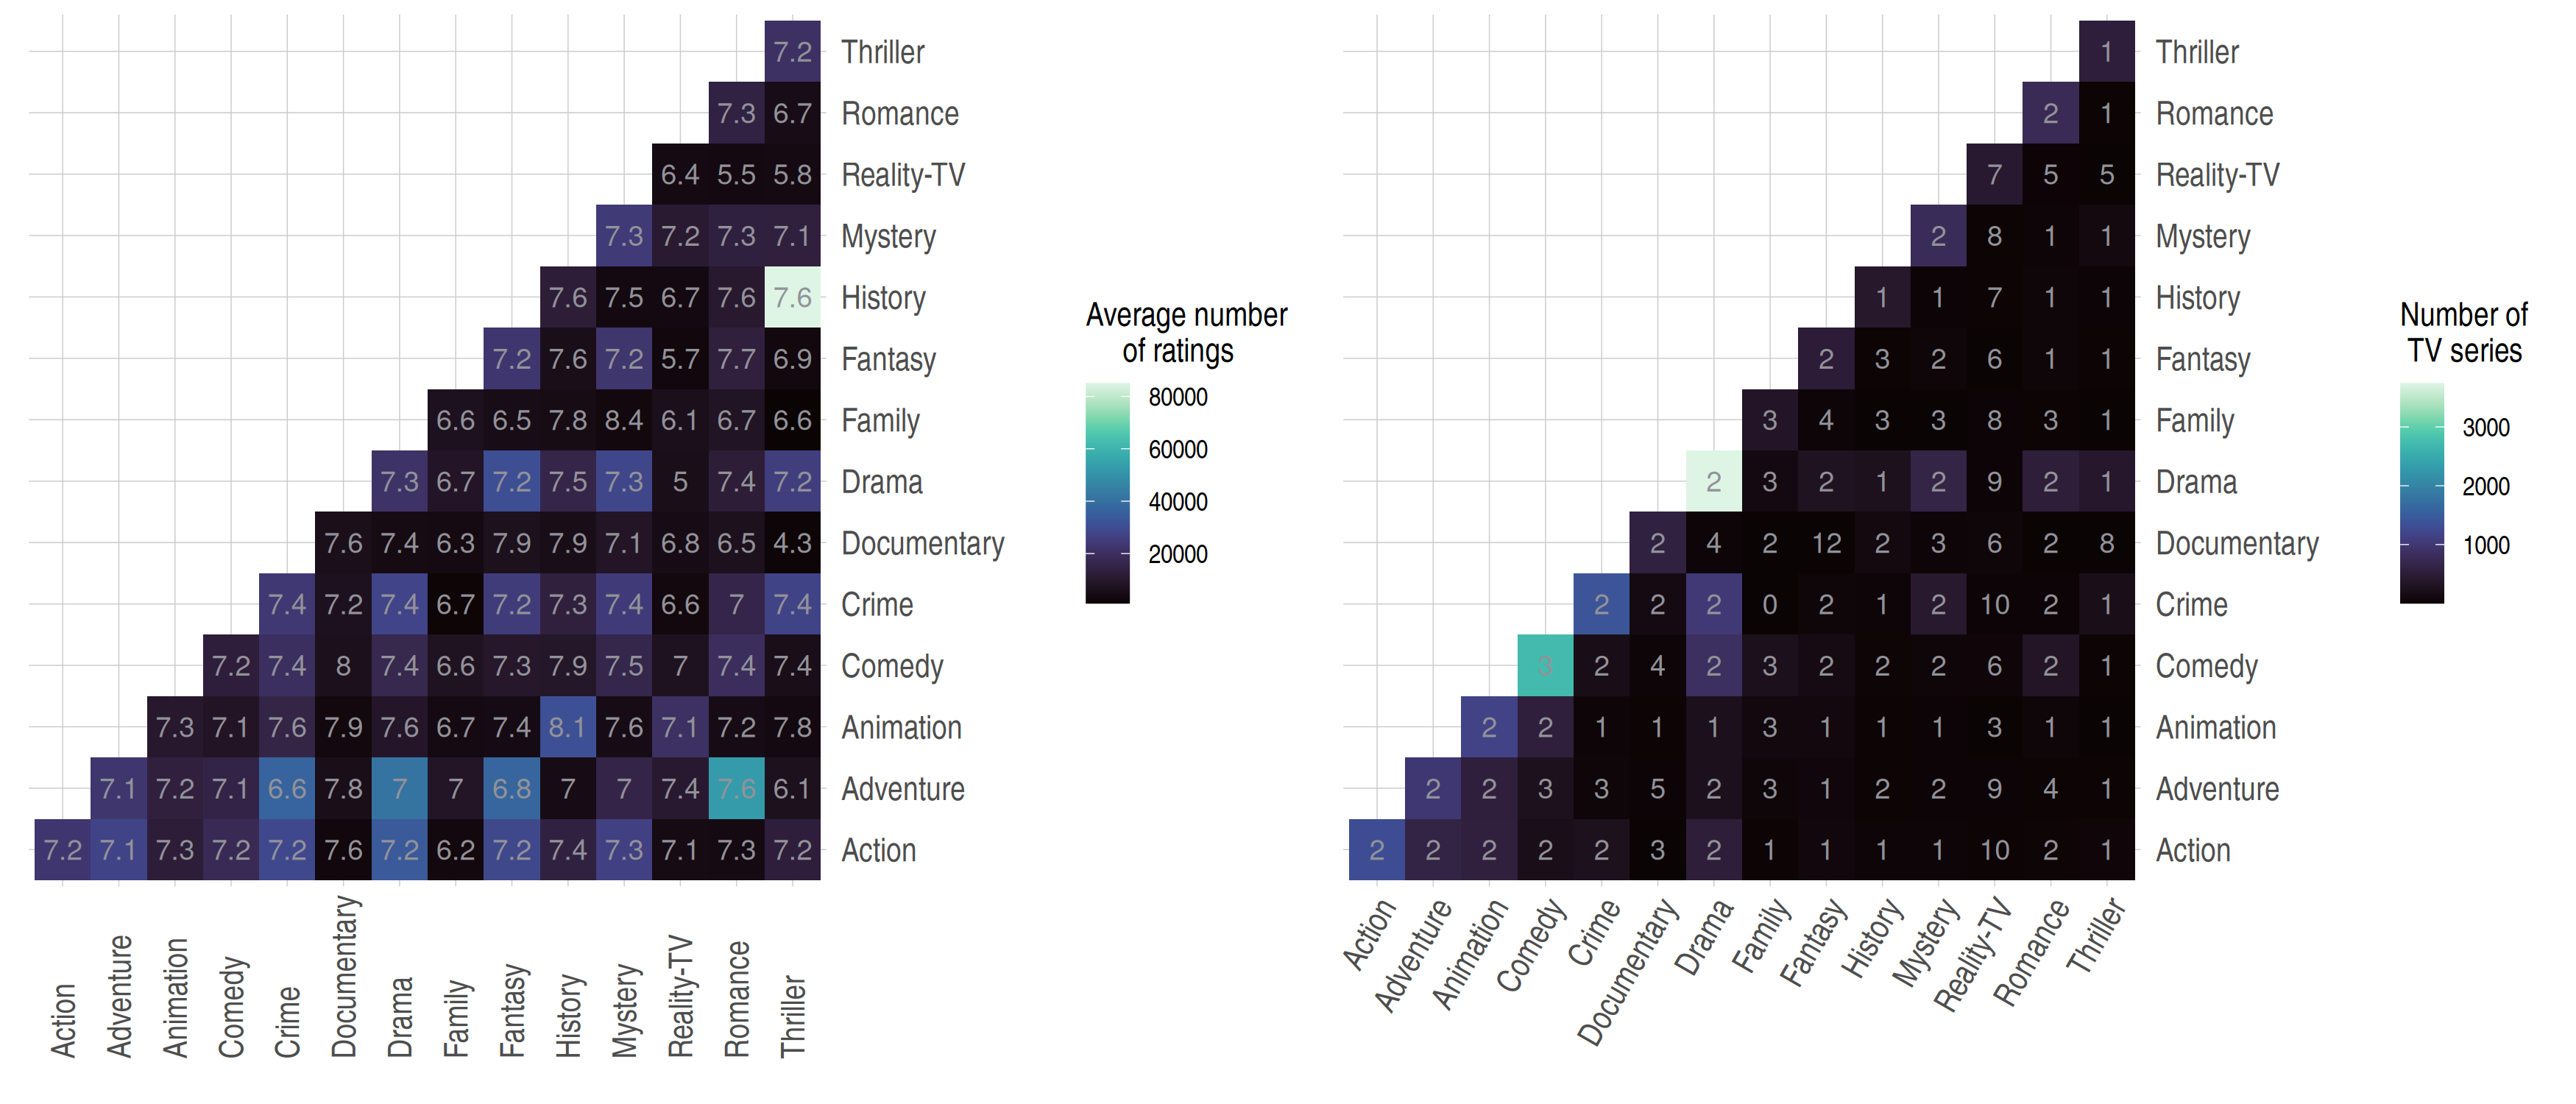

In [438]:
plt1 + plt2 & theme(legend.position = "right", plot.margin=grid::unit(c(1,2,1,2), "mm"))